In [9]:
import sys

sys.path.append("..")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, eV, epsilon_0, e, physical_constants
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh, eig
import src.fem_1d_eigen
import importlib
from src.fem_1d_eigen import *

importlib.reload(src.fem_1d_eigen)

<module 'src.fem_1d_eigen' from '/home/yamamoto/physics/fem/fem_schrodinger/examples/../src/fem_1d_eigen.py'>

In [11]:
xs = np.linspace(-1e-8, 1e-8, 100)
x_centers = (xs[:-1] + xs[1:]) / 2
omega = 1e14
v = 1 / 2 * m_e * omega**2 * x_centers**2
femeig = Fem1dEigen(xs)
K0 = femeig.get_K0()
M = femeig.get_M()
K1 = femeig.get_K1(v)
K0_dirichlet = K0[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
K1_dirichlet = K1[1:-1, 1:-1]

k = 3
C0 = hbar**2 / (m_e)
C1 = e**2 / (4 * np.pi * epsilon_0)
val, vec = eigsh(
    -1 / 2 * C0 * K0_dirichlet + K1_dirichlet,
    k=k,
    M=M_dirichlet,
    which="LA",
    sigma=0,
)

# val, vec = eigh(
#  K_dirichlet + V_dirichlet,
#  M_dirichlet,
# )

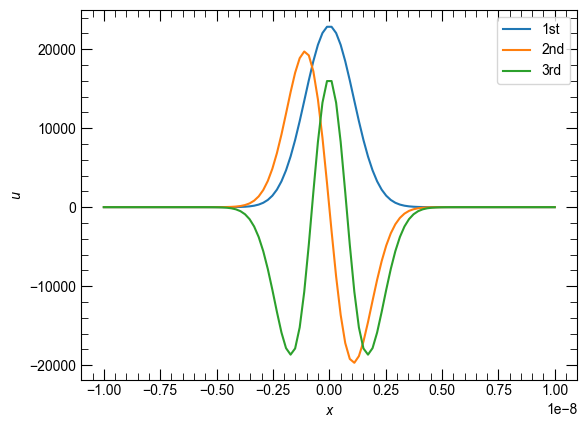

In [12]:
vec_0 = np.insert(vec, 0, 0, axis=0)
vec_0_m1 = np.insert(vec_0, vec_0.shape[0], 0, axis=0)
fig, ax = plt.subplots()
ax.plot(xs, vec_0_m1[:, 0], label="1st")
ax.plot(xs, vec_0_m1[:, 1], label="2nd")
ax.plot(xs, vec_0_m1[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("eigenfunction.pdf")

In [13]:
vals = []
part1 = np.arange(10, 100, 10)
part2 = np.arange(100, 1000, 100)
combined = np.concatenate((part1, part2))
for i in combined:
    print(i)
    xs = np.linspace(-1e-8, 1e-8, i)
    x_centers = (xs[:-1] + xs[1:]) / 2
    v = 1 / 2 * m_e * omega**2 * x_centers**2
    femeig = Fem1dEigen(xs)
    K0 = femeig.get_K0()
    M = femeig.get_M()
    K1 = femeig.get_K1(v)
    K0_dirichlet = K0[1:-1, 1:-1]
    M_dirichlet = M[1:-1, 1:-1]
    K1_dirichlet = K1[1:-1, 1:-1]
    val, vec = eigsh(
        -1 / 2 * C0 * K0_dirichlet + K1_dirichlet,
        k=1,
        M=M_dirichlet,
        which="LA",
        sigma=0,
    )
    vals.append(val)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900


[1.]


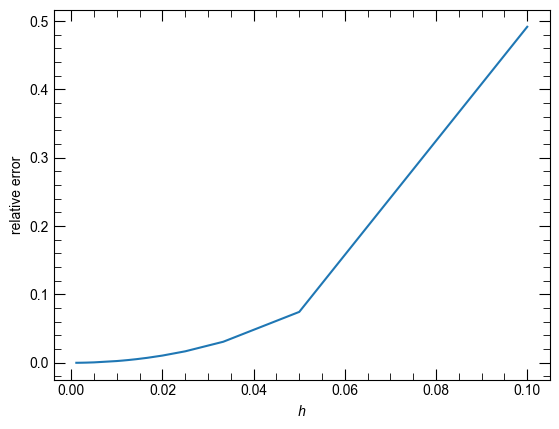

In [14]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.abs(1 / 2 - (np.array(vals) / (hbar * omega))))
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("convergence.pdf")

In [15]:
h = 1 / np.array([100, 500, 1000, 5000])
err = 0.5 - np.array([0.496368, 0.499845, 0.499962, 0.499998])

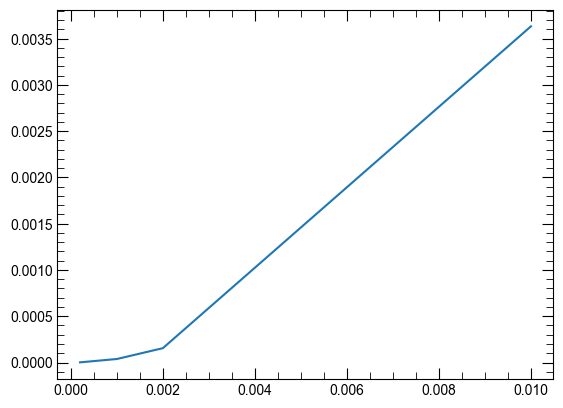

In [16]:
fig, ax = plt.subplots()
ax.plot(h, err)